### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')

In [9]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [12]:
#Examining the data for columns an data types for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [14]:
#Examining the shape of the dataframe
data.shape

(12684, 26)

In [16]:
#Examining the dataframe for missining values
missing_data = data.isnull().sum()
missing_data

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

The dataframe has six columns with missing values. These columns are - "car", "Bar", "CoffeeHouse", "CarryAway ", "RestaurantLessThan20" and "Restaurant20To50".

In [19]:
# percentage of missing data values as compared to complete dataframe 
print('Percent of missing "car" records is %.2f%%' %((data['car'].isnull().sum()/data.shape[0])*100))
print('Percent of missing "Bar" records is %.2f%%' %((data['Bar'].isnull().sum()/data.shape[0])*100))
print('Percent of missing "CoffeeHouse" records is %.2f%%' %((data['CoffeeHouse'].isnull().sum()/data.shape[0])*100))
print('Percent of missing "CarryAway" records is %.2f%%' %((data['CarryAway'].isnull().sum()/data.shape[0])*100))
print('Percent of missing "RestaurantLessThan20" records is %.2f%%' %((data['RestaurantLessThan20'].isnull().sum()/data.shape[0])*100))
print('Percent of missing "Restaurant20To50" records is %.2f%%' %((data['Restaurant20To50'].isnull().sum()/data.shape[0])*100))

Percent of missing "car" records is 99.15%
Percent of missing "Bar" records is 0.84%
Percent of missing "CoffeeHouse" records is 1.71%
Percent of missing "CarryAway" records is 1.19%
Percent of missing "RestaurantLessThan20" records is 1.02%
Percent of missing "Restaurant20To50" records is 1.49%


3. Decide what to do about your missing data -- drop, replace, other...

**Analysing "car" column for missing values**

So "car" column has 99.15% missing values and it may be prudent to drop this column. On the other hand, it may be better to use other methods for imputing the data for missing values under the columns "Bar", "CoffeeHouse", "CarryAway", "CarryAway", "RestaurantLessThan20" and "Restaurant20To50".  But before that, the data under this column needs to be analysed.

In [24]:
data ["car"].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

The column "car" contains the data for the type of vehicle being used by the the person being surveyed. This type of data is unlikely to have any impact on their decision to accept or refuse coupon. Moreover, since the dataframe already contains data with respect to the income of the persons being surveyed, the quality of data is unlikely to suffer if column "car" is dropped.

In [27]:
# Dropping the column 'car' 
data = data.drop('car', axis=1)
data.shape

(12684, 25)

**Analysing "Bar" column and replacing missing values**

In [30]:
data ["Bar"].value_counts()

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

"Bar" column has categorical data and hence the missing data can be replaced with mode.

In [33]:
# Replacing missing values for column "Bar" with mode of the column
data['Bar'] = data['Bar'].fillna(data['Bar'].mode()[0])
data['Bar'].isna().sum()

0

**Analysing "CoffeeHouse" column and replacing missing values**

In [36]:
data ["CoffeeHouse"].value_counts()

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

"CoffeeHouse" column has categorical data and hence the missing data can be replaced with mode.

In [39]:
# Replacing missing values for column "CoffeeHouse" with mode of the column
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0])
data['CoffeeHouse'].isna().sum()

0

**Analysing "CarryAway" column and replacing missing values**

"CarryAway" column has categorical data and hence the missing data can be replaced with mode.

In [44]:
# Replacing missing values for column "CarryAway" with mode of the column
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].mode()[0])
data['CarryAway'].isna().sum()

0

**Analysing "RestaurantLessThan20" column and replacing missing values**

In [47]:
data ["RestaurantLessThan20"].value_counts()

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

"RestaurantLessThan20" column has categorical data and hence the missing data can be replaced with mode.

In [50]:
# Replacing missing values for column "RestaurantLessThan20" with mode of the column
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0])
data['RestaurantLessThan20'].isna().sum()

0

**Analysing "Restaurant20To50" column and replacing missing values**

In [53]:
data ["Restaurant20To50"].value_counts()

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64

"Restaurant20To50" column has categorical data and hence the missing data can be replaced with mode.

In [56]:
# Replacing missing values for column "RestaurantLessThan20" with mode of the column
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0])
data['Restaurant20To50'].isna().sum()

0

4. What proportion of the total observations chose to accept the coupon?



In [59]:
# Calculate proportion of coupon acceptance
accepted_proportion = data[data["Y"] == 1].shape[0]/data.shape[0]

print(f"Proportion of users accepting the coupon: {accepted_proportion}")
print(f"Percentage of users accepting the coupon: {accepted_proportion * 100:.2f}%")

Proportion of users accepting the coupon: 0.5684326710816777
Percentage of users accepting the coupon: 56.84%


Thus, proportion of users accepting the coupon is 0.5684326710816777 and the percentage of users accepting the coupon is 56.84%

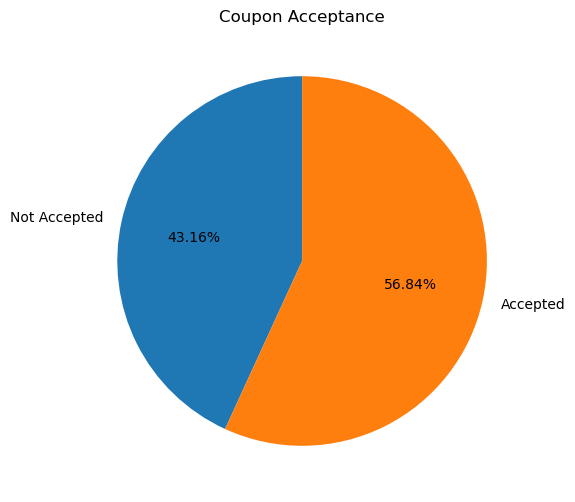

In [62]:
counts = data['Y'].value_counts().sort_index()
labels = ['Not Accepted', 'Accepted']

plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title('Coupon Acceptance')
plt.show()

5. Use a bar plot to visualize the `coupon` column.

<function matplotlib.pyplot.show(close=None, block=None)>

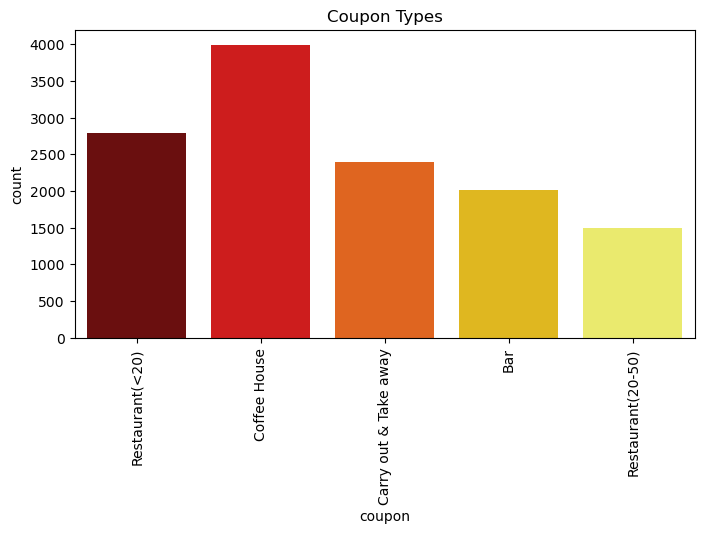

In [65]:
plt.figure(figsize=(8, 4))
sns.countplot(data = data, x = 'coupon', palette='hot', hue = 'coupon')
plt.title("Coupon Types")
plt.xticks(rotation=90)
plt.show

6. Use a histogram to visualize the temperature column.

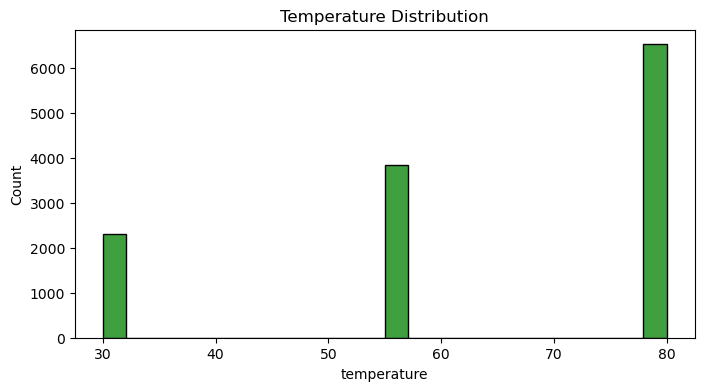

In [68]:
plt.figure(figsize=(8, 4))
sns.histplot(data = data, x = 'temperature', color = 'green')
plt.title("Temperature Distribution")
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [71]:
# Creating a new DataFrame that contains just the bar coupons.
bar_coupon_df = data[data['coupon'] == 'Bar']
bar_coupon_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [74]:
# Calculating proportion of bar coupons that were accepted.
accepted_bar_coupon_proportion = bar_coupon_df.loc[bar_coupon_df['Y'] == 1].shape[0] / bar_coupon_df.shape[0]

print(f"Proportion of bar coupons accepted: {accepted_bar_coupon_proportion}")
print(f"Percentage of bar coupons accepted: {accepted_bar_coupon_proportion*100:.2f}%")

Proportion of bar coupons accepted: 0.41001487357461575
Percentage of bar coupons accepted: 41.00%


Thus, proportion of bar coupons that were accepted is 0.41001487357461575 and the percentage of bar coupons that were accepted is 41.00%

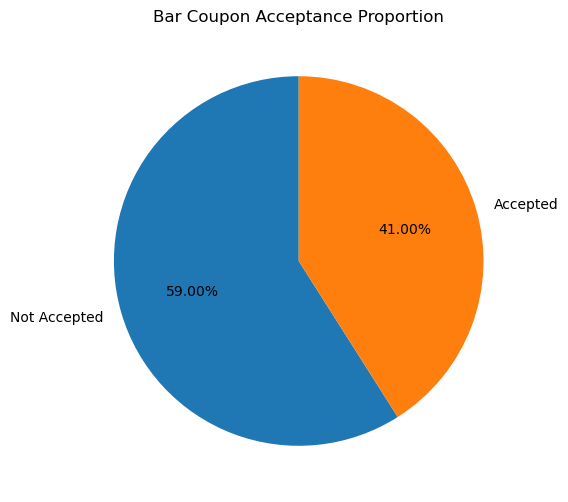

In [77]:
counts = bar_coupon_df['Y'].value_counts()
labels = ['Not Accepted', 'Accepted']

plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title('Bar Coupon Acceptance Proportion')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [80]:
bar_coupon_df ["Bar"].value_counts()

Bar
never    851
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

In [82]:
bar_visit_3_or_less = ['1~3', 'less1', 'never']
bar_visit_4_or_more = ['4~8','gt8']

less_frequent = bar_coupon_df[bar_coupon_df['Bar'].isin(bar_visit_3_or_less)]
more_frequent = bar_coupon_df[bar_coupon_df['Bar'].isin(bar_visit_4_or_more)]

# Acceptance rate for both
acceptance_rate_less_frequent = less_frequent['Y'].mean()
acceptance_rate_more_frequent = more_frequent['Y'].mean()

print(f"Acceptance rate for those who went to bar 3 or fewer times : {acceptance_rate_less_frequent}")
print(f"Acceptance rate for those who went to bar more than 3 times : {acceptance_rate_more_frequent}")

Acceptance rate for those who went to bar 3 or fewer times : 0.37073707370737075
Acceptance rate for those who went to bar more than 3 times : 0.7688442211055276


So, 'Acceptance rate for those who went to bar more than 3 times' is more as compared to 'Acceptance rate for those who went to bar 3 or fewer times'.

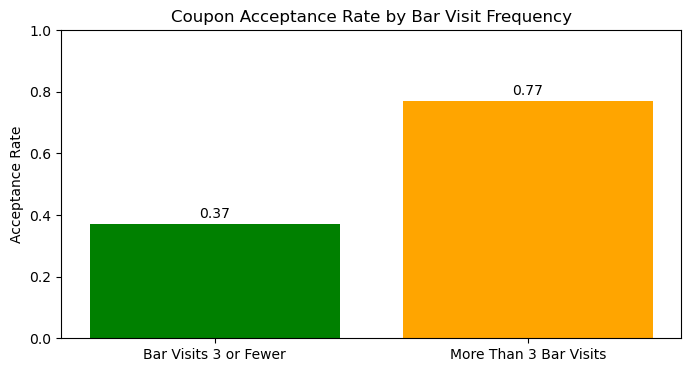

In [85]:
groups = ['Bar Visits 3 or Fewer', 'More Than 3 Bar Visits']
acceptance_rates = [acceptance_rate_less_frequent, acceptance_rate_more_frequent]

plt.figure(figsize=(8,4))
bars = plt.bar(groups, acceptance_rates, color=['green', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Acceptance Rate')
plt.title('Coupon Acceptance Rate by Bar Visit Frequency')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', fontsize=10)

plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [88]:
bar_coupon_df ["age"].value_counts()

age
21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: count, dtype: int64

In [90]:
bar_visit_more_than_once = ['1~3', '4~8','gt8']
age_over_25 = ['26','31', '36', '41', '46', '50plus']

# Filtering bar coupon users who satisfy both conditions
high_age_and_frequent_bar = bar_coupon_df[
    (bar_coupon_df['Bar'].isin(bar_visit_more_than_once)) &
    (bar_coupon_df['age'].isin(age_over_25))
]

# All others
others = bar_coupon_df.drop(high_age_and_frequent_bar.index)

# Acceptance rates
acceptance_rate_high_age_and_frequent_bar = high_age_and_frequent_bar['Y'].mean()
acceptance_rate_others = others['Y'].mean()

print(f"Acceptance rate for age >25 and frequent bar visitors: {acceptance_rate_high_age_and_frequent_bar}")
print(f"Acceptance rate for all others: {acceptance_rate_others}")

Acceptance rate for age >25 and frequent bar visitors: 0.6952380952380952
Acceptance rate for all others: 0.33500313087038197


So acceptance rate is more than twice for those who are over 25 years of age and have visted the bar more than once.

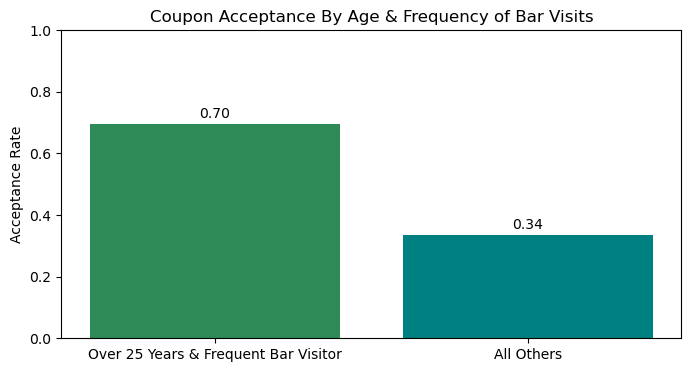

In [93]:
labels = ['Over 25 Years & Frequent Bar Visitor', 'All Others']
rates = [acceptance_rate_high_age_and_frequent_bar, acceptance_rate_others]

plt.figure(figsize=(8,4))
bars = plt.bar(labels, rates, color=['seagreen', 'teal'])
plt.ylim(0, 1)
plt.ylabel('Acceptance Rate')
plt.title('Coupon Acceptance By Age & Frequency of Bar Visits')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', fontsize=10)

plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [96]:
bar_coupon_df ["passanger"].value_counts()

passanger
Alone        1200
Friend(s)     337
Partner       274
Kid(s)        206
Name: count, dtype: int64

In [98]:
bar_coupon_df ["occupation"].value_counts()

occupation
Unemployed                                   301
Student                                      251
Computer & Mathematical                      232
Sales & Related                              178
Education&Training&Library                   140
Management                                   119
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Personal Care & Service                       27
Protective Service                            27
Construction & Extraction                     24
Life Phys

In [100]:
bar_visit_more_than_once = ['1~3', '4~8','gt8']
passenger_excluding_kids = ['Kid(s)']
occupations_excluding_farming_fishing_and_forestry = ['Farming Fishing & Forestry']

# Filtering bar coupon users who satisfy all three conditions
frequent_bar_visitors_not_kids_not_farmers = bar_coupon_df[
    (bar_coupon_df['Bar'].isin(bar_visit_more_than_once)) &
    (~bar_coupon_df['passanger'].isin(passenger_excluding_kids)) &
    (~bar_coupon_df['occupation'].isin(occupations_excluding_farming_fishing_and_forestry))
]

# All others
others = bar_coupon_df.drop(frequent_bar_visitors_not_kids_not_farmers.index)

# Acceptance rates
acceptance_rate_frequent_bar_visitors_not_kids_not_farmers = frequent_bar_visitors_not_kids_not_farmers['Y'].mean()
acceptance_rate_others = others['Y'].mean()

print(f"Acceptance rate for frequent bar visitors who didnot have kids as passengers and were not farmers: {acceptance_rate_frequent_bar_visitors_not_kids_not_farmers}")
print(f"Acceptance rate for all others: {acceptance_rate_others}")

Acceptance rate for frequent bar visitors who didnot have kids as passengers and were not farmers: 0.7132486388384754
Acceptance rate for all others: 0.296043656207367


Acceptance rate is more than twice for those who have visted the bar more than once, donot have kid(s) as passengers and have occupations other than farming, fishing, or forestry. Thus, this subset can be focused for targeted promotions or personalized marketing campaigns.

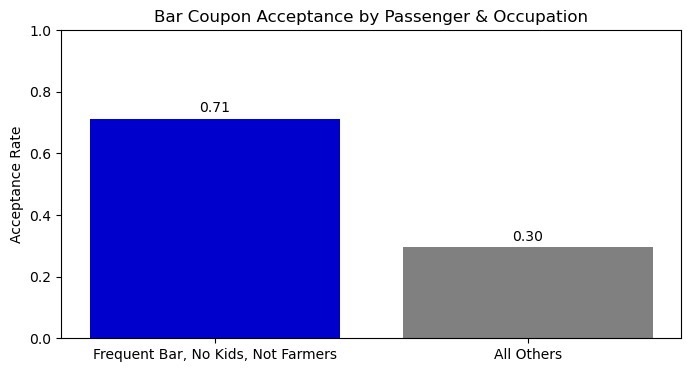

In [103]:
labels = ['Frequent Bar, No Kids, Not Farmers', 'All Others']
rates = [acceptance_rate_frequent_bar_visitors_not_kids_not_farmers, acceptance_rate_others]

plt.figure(figsize=(8, 4))
bars = plt.bar(labels, rates, color=['mediumblue', 'gray'])
plt.ylim(0, 1)
plt.ylabel('Acceptance Rate')
plt.title('Bar Coupon Acceptance by Passenger & Occupation')

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', fontsize=10)

plt.show()


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [106]:
bar_coupon_df ["maritalStatus"].value_counts()

maritalStatus
Married partner      882
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: count, dtype: int64

In [108]:
bar_coupon_df ["income"].value_counts()

income
$25000 - $37499     318
$100000 or More     291
$12500 - $24999     288
$37500 - $49999     267
$50000 - $62499     262
Less than $12500    165
$75000 - $87499     151
$87500 - $99999     145
$62500 - $74999     130
Name: count, dtype: int64

In [110]:
bar_coupon_df ["RestaurantLessThan20"].value_counts()

RestaurantLessThan20
1~3      901
4~8      568
less1    325
gt8      186
never     37
Name: count, dtype: int64

In [112]:
bar_visit_more_than_once = ['1~3', '4~8', 'gt8']
passenger_excluding_kids = ['Kid(s)']
excluding_marital_status = ['Widowed']
age_under_30 = ['below21', '21', '26']
income_under_50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
More_than_4_visits_to_cheap_restaurants = ['4~8', 'gt8']

# Filtering bar coupon users who satisfy the given conditions 
# condition 1
target_group_1 = bar_coupon_df[
    (bar_coupon_df['Bar'].isin(bar_visit_more_than_once)) &
    (~bar_coupon_df['passanger'].isin(passenger_excluding_kids)) &
    (~bar_coupon_df['maritalStatus'].isin(excluding_marital_status))
]

# condition 2
target_group_2 = bar_coupon_df[
    (bar_coupon_df['Bar'].isin(bar_visit_more_than_once)) &
    (bar_coupon_df['age'].isin(age_under_30)) 
]

# condition 3
target_group_3 = bar_coupon_df[
    (bar_coupon_df['RestaurantLessThan20'].isin(More_than_4_visits_to_cheap_restaurants)) &
    (bar_coupon_df['income'].isin(income_under_50k))
]

# All others
combined_group = target_group_1.index.union(target_group_2.index).union(target_group_3.index)
target_groups_1_2_3 = bar_coupon_df.loc[combined_group]
others = bar_coupon_df.drop(combined_group)

# Acceptance rates
acceptance_rate_target_groups_1_2_3 = target_groups_1_2_3['Y'].mean()
acceptance_rate_others = others['Y'].mean()

print(f"Acceptance rate for those who go to bars more than once a month, had passengers that were not a kid and were not widowed: {target_group_1['Y'].mean()}")
print(f"Acceptance rate for those who went to bars more than once a month and are under the age of 30: {target_group_2['Y'].mean()}")
print(f"Acceptance rate for those who went to cheap restaurants more than 4 times a month and income is less than 50K: {target_group_3['Y'].mean()}")
print(f"Acceptance rate for all others: {others['Y'].mean()}")

Acceptance rate for those who go to bars more than once a month, had passengers that were not a kid and were not widowed: 0.7132486388384754
Acceptance rate for those who went to bars more than once a month and are under the age of 30: 0.7217391304347827
Acceptance rate for those who went to cheap restaurants more than 4 times a month and income is less than 50K: 0.45348837209302323
Acceptance rate for all others: 0.29814665592264306


So, those who are not with kids and not widowed are more likely to accept the coupons. Similarly, younger persons (under the age of 30 years) are more likely to accept the coupons. These two groups are more likely to accept the coupons compared to all other groups. Those with lower income are less likely to accept the coupon.

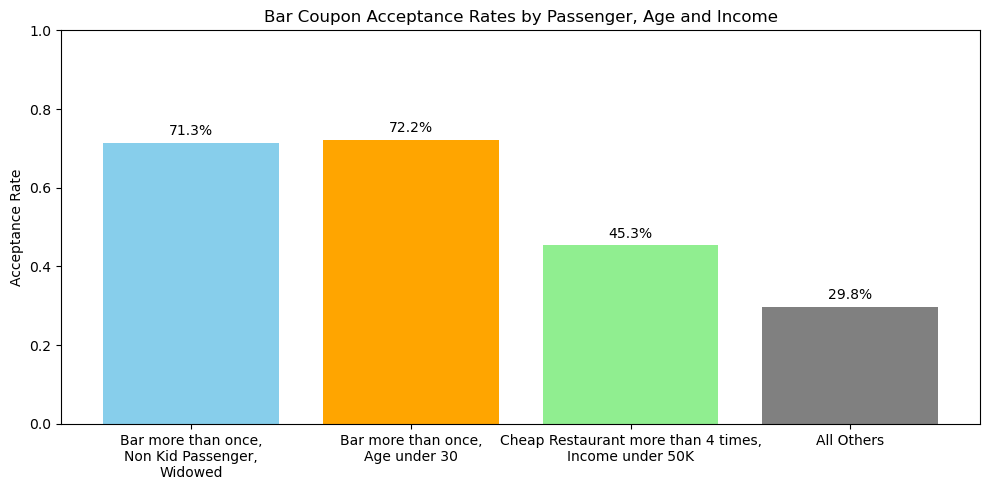

In [115]:
group_labels = [
    'Bar more than once,\nNon Kid Passenger,\nWidowed',
    'Bar more than once,\nAge under 30',
    'Cheap Restaurant more than 4 times,\nIncome under 50K',
    'All Others'
]
acceptance_rates = [
    target_group_1['Y'].mean(),
    target_group_2['Y'].mean(),
    target_group_3['Y'].mean(),
    others['Y'].mean()
]

# Plot
plt.figure(figsize=(10,5))
bars = plt.bar(group_labels, acceptance_rates, color=['skyblue', 'orange', 'lightgreen', 'gray'])
plt.ylim(0, 1)
plt.ylabel('Acceptance Rate')
plt.title('Bar Coupon Acceptance Rates by Passenger, Age and Income')

# Add % labels on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.02, f'{height:.1%}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Summary of Findings**

1. Frequent visitors to bar are more likely to accept the bar coupon.

2. Those traveling with non-kid passenger are more likely to accept the bar coupons.

3. Younger persons (under the age of 30) are more likely to accept the bar coupons.

4. People with lower income are less likely to accept the bar coupons.

5. Non-widowed drivers and those not in farming/fishing/forestry occupations are more likely to accept the bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [120]:
# Creating a new DataFrame that contains just the CoffeeHouse coupons.
CoffeeHouse_coupon_df = data[data['coupon'] == 'Coffee House']
CoffeeHouse_coupon_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [122]:
# Filtering accepted Coffee House Coupons
accept_coffee_coupon_df = data.query('Y == 1 and coupon == "Coffee House"')
accept_coffee_coupon_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
16,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,1
21,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
45,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
48,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12579,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,21,Single,...,never,1~3,1~3,less1,1,0,0,1,0,1
12601,Home,Alone,Rainy,55,10PM,Coffee House,2h,Female,50plus,Divorced,...,less1,1~3,1~3,less1,1,0,0,1,0,1
12608,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,50plus,Divorced,...,less1,1~3,1~3,less1,1,0,0,1,0,1
12624,Home,Alone,Rainy,55,10PM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1~3,less1,1,0,0,1,0,1


In [124]:
proportion = CoffeeHouse_coupon_df[CoffeeHouse_coupon_df["Y"] == 1].shape[0]/CoffeeHouse_coupon_df.shape[0]
print(proportion)

0.49924924924924924


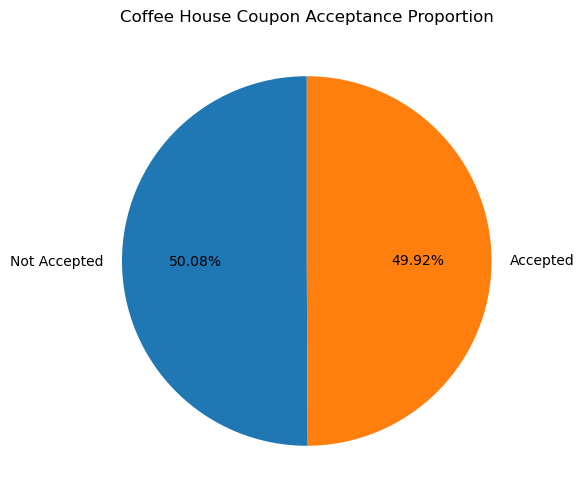

In [126]:
counts = CoffeeHouse_coupon_df['Y'].value_counts()
labels = ['Not Accepted', 'Accepted']

plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title('Coffee House Coupon Acceptance Proportion')
plt.show()

Approximately, half of the Coffee House coupons were accepted.

In [129]:
# Coffee House Coupon Acceptance by Passenger type
# Group by Age and calculate acceptance rate
coffee_by_passenger = CoffeeHouse_coupon_df.groupby('passanger')['Y'].agg(['mean', 'count']).sort_values(by='mean', ascending = False)
print(coffee_by_passenger)

               mean  count
passanger                 
Friend(s)  0.596906   1228
Partner    0.570492    305
Kid(s)     0.483092    207
Alone      0.437943   2256


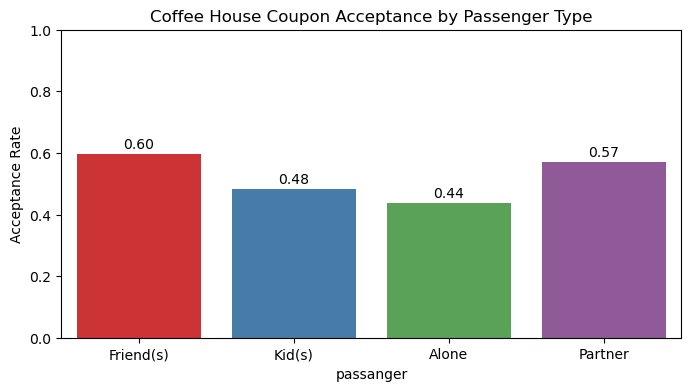

In [131]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=CoffeeHouse_coupon_df, x='passanger', y='Y', estimator=np.mean, palette='Set1', hue='passanger', errorbar = None)
plt.title('Coffee House Coupon Acceptance by Passenger Type')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)


# Add value labels above the bars
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f', label_type='edge', padding=2)
    
plt.show()

Those travelling with friends or partner are more likely to accept the Coffee House coupon.

In [134]:
# Coffee House Coupon Acceptance by Age
# Group by Age and calculate acceptance rate
coffee_by_age = CoffeeHouse_coupon_df.groupby('age')['Y'].agg(['mean', 'count']).sort_values(by='mean', ascending = False)
print(coffee_by_age)

             mean  count
age                     
below21  0.696774    155
21       0.524349    883
26       0.514828    843
46       0.513636    220
41       0.501538    325
31       0.476726    623
36       0.467662    402
50plus   0.420183    545


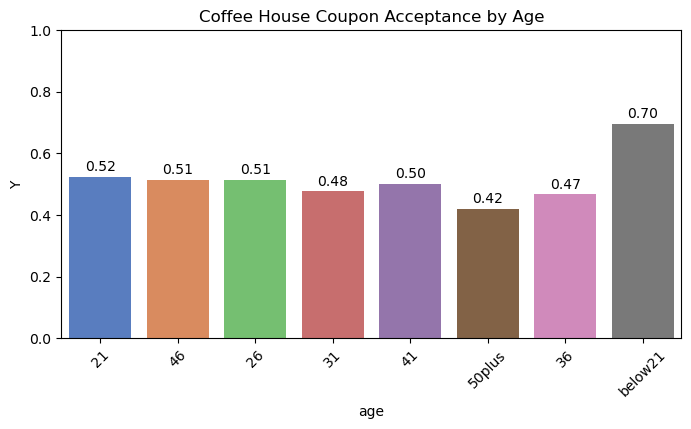

In [136]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=CoffeeHouse_coupon_df, x ='age', y='Y', errorbar = None, palette='muted', hue = 'age' )
plt.title("Coffee House Coupon Acceptance by Age")
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Add value labels above the bars
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f', label_type='edge', padding=2)
    
plt.show()

Younger drivers, especially those under 30 years, are more likely to accept the Coffee House coupon.

In [139]:
# Coffee House Coupon Acceptance by Age and Partner
age_30_or_below = ['below21', '21', '26']
with_partner_or_friend = ['Partner', 'Friend(s)']

age_30_or_below_and_with_partner = CoffeeHouse_coupon_df[
    (CoffeeHouse_coupon_df['age'].isin(age_30_or_below)) &
    (CoffeeHouse_coupon_df['passanger'].isin(with_partner_or_friend))
]

others = CoffeeHouse_coupon_df.drop(age_30_or_below_and_with_partner.index)

print(f"Acceptance rate for ≤30 with partner or friend as passenger: {age_30_or_below_and_with_partner['Y'].mean():.2f}")
print(f"Acceptance rate for others: {others['Y'].mean():.2f}")


Acceptance rate for ≤30 with partner or friend as passenger: 0.62
Acceptance rate for others: 0.47


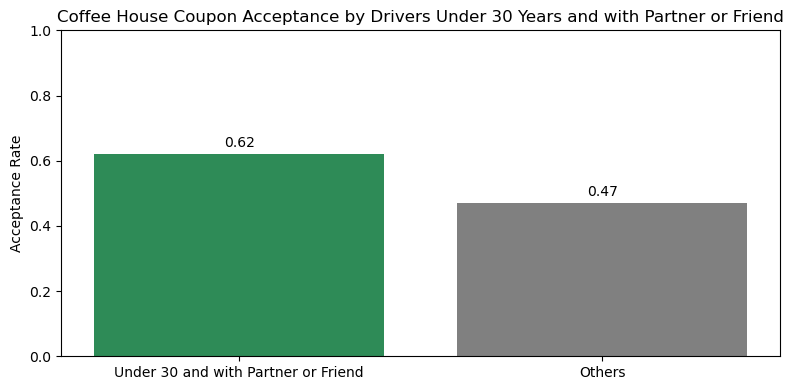

In [141]:
groups = ['Under 30 and with Partner or Friend', 'Others']
acceptance_rates = [
    age_30_or_below_and_with_partner['Y'].mean(),
    others['Y'].mean()
]

plt.figure(figsize=(8, 4))
bars = plt.bar(groups, acceptance_rates, color=['seagreen', 'gray'])
plt.ylim(0, 1)
plt.ylabel('Acceptance Rate')
plt.title('Coffee House Coupon Acceptance by Drivers Under 30 Years and with Partner or Friend')

# Add value labels above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Drivers under 30 years of age and with partner or friends are more likely to accept the Coffee House coupon.

In [144]:
# Coffee House Coupon Acceptance by Time
# Group by Time and calculate acceptance rate
coffee_by_time = CoffeeHouse_coupon_df.groupby('time')['Y'].agg(['mean', 'count']).sort_values(by='mean', ascending = False)
print(coffee_by_time)

          mean  count
time                 
10AM  0.640712    899
2PM   0.547859    794
7AM   0.445783    913
10PM  0.424242    297
6PM   0.412626   1093


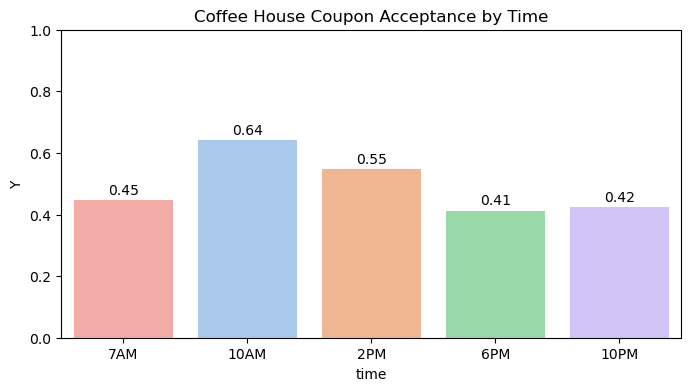

In [146]:
plt.figure(figsize=(8, 4))
order = ['7AM', '10AM', '2PM', '6PM', '10PM']
ax = sns.barplot(data=CoffeeHouse_coupon_df, x='time', y='Y', errorbar = None, palette='pastel', hue = 'time', order=order)
plt.title("Coffee House Coupon Acceptance by Time")
plt.ylim(0, 1)

# Add value labels above the bars
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f', label_type='edge', padding=2)
    
plt.show()


Coffee House coupons are more likely to be accepted during day hours and less likely during early morning or late night hours.

In [149]:
# Coffee House Coupon Acceptance by Weather
# Group by Weather and calculate acceptance rate
coffee_by_weather = CoffeeHouse_coupon_df.groupby('weather')['Y'].agg(['mean', 'count']).sort_values(by='mean', ascending = False)
print(coffee_by_weather)

             mean  count
weather                 
Rainy    0.522124    226
Sunny    0.503605   3467
Snowy    0.432343    303


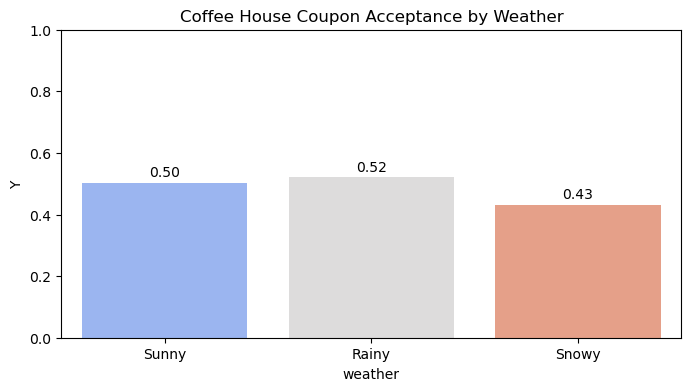

In [151]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=CoffeeHouse_coupon_df, x='weather', y='Y', errorbar = None, palette='coolwarm', hue = 'weather')
plt.title("Coffee House Coupon Acceptance by Weather")
plt.ylim(0, 1)

# Add value labels above the bars
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f', label_type='edge', padding=2)

plt.show()


Coffee House coupons are more likely to be accepted during sunny or rainy weather. Acceptance goes down during snowy weather.

In [154]:
# Coffee House Coupon Acceptance by Time, Weather and Partner
better_time_hours = ['10AM', '2PM','6PM']
pleasant_weather = ['Sunny', 'Rainy']
with_partner_or_friend = ['Partner', 'Friend(s)']

# Creating group matching all three conditions
group_time_weather_partner = CoffeeHouse_coupon_df[
    (CoffeeHouse_coupon_df['time'].isin(better_time_hours)) &
    (CoffeeHouse_coupon_df['weather'].isin(pleasant_weather)) &
    (CoffeeHouse_coupon_df['passanger'].isin(with_partner_or_friend))
]

others = CoffeeHouse_coupon_df.drop(group_time_weather_partner.index)

# Calculate acceptance rates
group_acceptance = group_time_weather_partner['Y'].mean()
others_acceptance = others['Y'].mean()

print(f"Acceptance rate for drivers with partner or friend during social hours in pleasant weather: {group_time_weather_partner['Y'].mean():.2f}")
print(f"Acceptance rate for others: {others['Y'].mean():.2f}")


Acceptance rate for drivers with partner or friend during social hours in pleasant weather: 0.59
Acceptance rate for others: 0.45


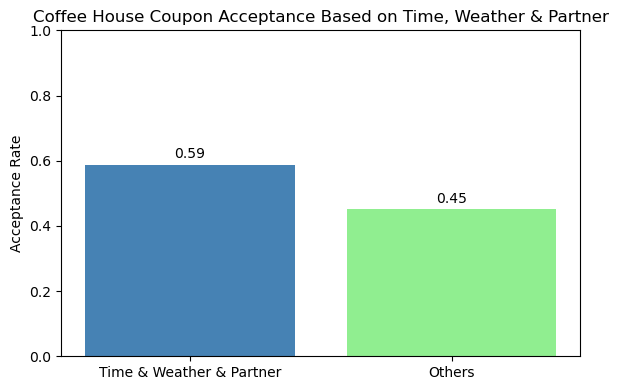

In [156]:
# Bar plot setup
groups = ['Time & Weather & Partner', 'Others']
acceptance_rates = [group_acceptance, others_acceptance]

plt.figure(figsize=(6, 4))
bars = plt.bar(groups, acceptance_rates, color=['steelblue', 'lightgreen'])
plt.ylim(0, 1)
plt.ylabel('Acceptance Rate')
plt.title('Coffee House Coupon Acceptance Based on Time, Weather & Partner')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Persons traveling during social hours, in pleasant weather and with a partner or friend are significantly more likely to accept Coffee House coupons.

In [159]:
# Coffee House Coupon Acceptance by Frequency of Visit
# Group by Frequency of Visit and calculate acceptance rate
coffee_by_frequency = CoffeeHouse_coupon_df.groupby('CoffeeHouse')['Y'].agg(['mean', 'count']).sort_values(by='mean', ascending = False)
print(coffee_by_frequency)

                 mean  count
CoffeeHouse                 
4~8          0.685874    538
gt8          0.657895    342
1~3          0.647793   1042
less1        0.480384   1147
never        0.188781    927


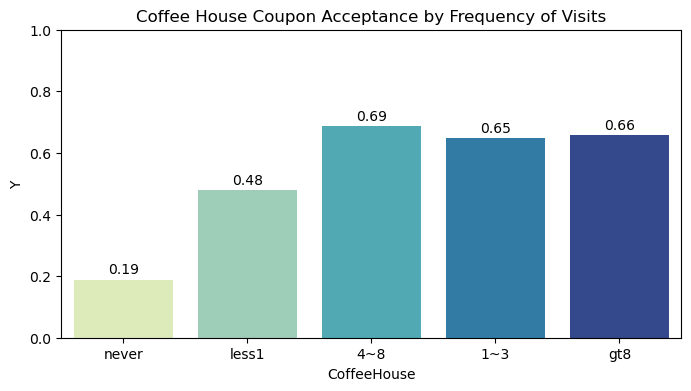

In [161]:
plt.figure(figsize=(8, 4))
ax=sns.barplot(data=CoffeeHouse_coupon_df, x='CoffeeHouse', y='Y', errorbar = None, palette='YlGnBu', hue = 'CoffeeHouse')
plt.title("Coffee House Coupon Acceptance by Frequency of Visits")
plt.ylim(0, 1)

# Add value labels above the bars
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f', label_type='edge', padding=2)

plt.show()


Those who have visited Coffee House once or more are more likely to accept Coffee House coupons.

In [164]:
# Coffee House Coupon Acceptance by Destination
# Group by Destination and calculate acceptance rate
coffee_by_destination = CoffeeHouse_coupon_df.groupby('destination')['Y'].agg(['mean', 'count']).sort_values(by='mean', ascending = False)
print(coffee_by_destination)

                     mean  count
destination                     
No Urgent Place  0.580974   2155
Work             0.445783    913
Home             0.362069    928


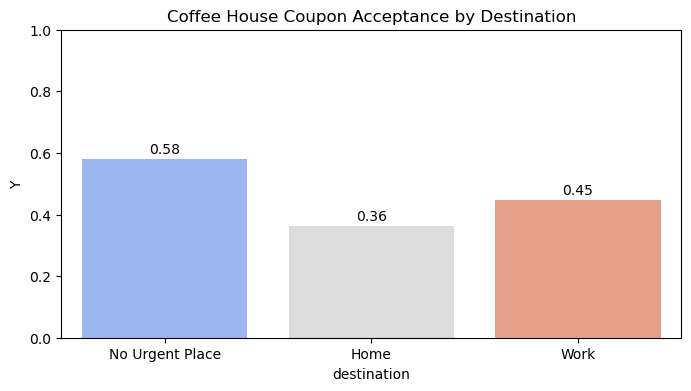

In [166]:
plt.figure(figsize=(8, 4))
ax=sns.barplot(data=CoffeeHouse_coupon_df, x='destination', y='Y', errorbar = None, palette='coolwarm', hue = 'destination')
plt.title("Coffee House Coupon Acceptance by Destination")
plt.ylim(0, 1)

# Add value labels above the bars
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f', label_type='edge', padding=2)
    
plt.show()


Those who have no urgency or are  going for work are more likely to accept Coffee House coupons. Persons heading home are less likely to accept the Coffee House coupon.

In [169]:
# Coffee House Coupon Acceptance by Time, Frequency of Visit and Destination
better_time_hours = ['10AM', '2PM', '6PM']
frequency_CoffeeHouse = ['4~8', 'gt8', '1~3']
destination = ['No Urgent Place', 'Work']

# Creating group matching all three conditions
group_time_frequency_destination = CoffeeHouse_coupon_df[
    (CoffeeHouse_coupon_df['time'].isin(better_time_hours)) &
    (CoffeeHouse_coupon_df['CoffeeHouse'].isin(frequency_CoffeeHouse)) &
    (CoffeeHouse_coupon_df['destination'].isin(destination))
]

others = CoffeeHouse_coupon_df.drop(group_time_frequency_destination.index)

# Calculate acceptance rates
group_acceptance = group_time_frequency_destination['Y'].mean()
others_acceptance = others['Y'].mean()

print(f"Acceptance rate for drivers travelling during social hours, are frequent to Coffee House and are not heading home : {group_time_frequency_destination['Y'].mean():.2f}")
print(f"Acceptance rate for others: {others['Y'].mean():.2f}")


Acceptance rate for drivers travelling during social hours, are frequent to Coffee House and are not heading home : 0.74
Acceptance rate for others: 0.42


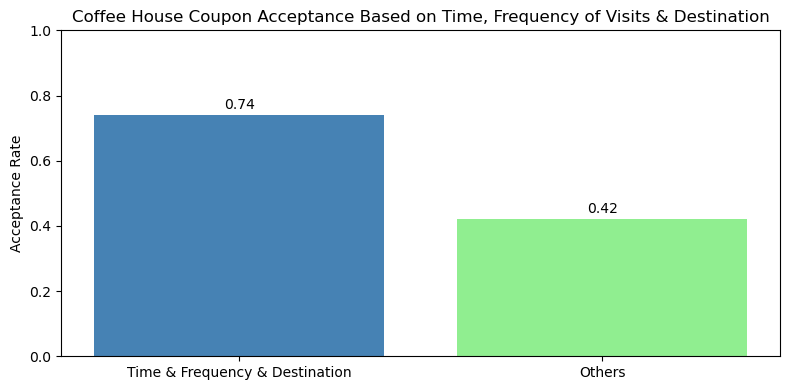

In [171]:
# Bar plot setup
groups = ['Time & Frequency & Destination', 'Others']
acceptance_rates = [group_acceptance, others_acceptance]

plt.figure(figsize=(8, 4))
bars = plt.bar(groups, acceptance_rates, color=['steelblue', 'lightgreen'])
plt.ylim(0, 1)
plt.ylabel('Acceptance Rate')
plt.title('Coffee House Coupon Acceptance Based on Time, Frequency of Visits & Destination')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Those who have no urgency or are going for work, are frequent to Coffee House and are travelling during more social hours are more significantly likely to accept Coffee House coupons. 

**Summary of Findings**

1. Approximately, half of the Coffee House coupons were accepted.
2. Those travelling with friends or partner are more likely to accept the Coffee House coupon.
3. Younger drivers, especially those under 30 years, are more likely to accept the Coffee House coupon.
4. Drivers under 30 years of age and with partner or friends are more likely to accept the Coffee House coupon.
5. Coffee House coupons are more likely to be accepted during day hours and less likely during early morning or late night hours.
6. Coffee House coupons are more likely to be accepted during sunny or rainy weather. Acceptance goes down during snowy weather.
7. Persons traveling during social hours, in pleasant weather and with a partner or friend are significantly more likely to accept Coffee House coupons.
8. Those who have visited Coffee House once or more are more likely to accept Coffee House coupons.
9. Those who have no urgency or are going for work are more likely to accept Coffee House coupons. Persons heading home are less likely to accept the Coffee House coupon.
10. Those who have no urgency or are going for work, are frequent to Coffee House and are travelling during more social hours are more significantly likely to accept Coffee House coupons. 

**Actionable Recommendations**

- Segment-Based Targeting

- **Bar Coupons**
  - Focus on individuals over 25 with bar visit history
  - Exclude those with kids as passengers or in farming/forestry occupations

- **Coffee House Coupons**
  - Prioritize younger drivers with partner/friend passengers
  - Target daytime hours, especially when weather is sunny or rainy
  - Focus on those with prior visits to coffee houses